# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Data

In [2]:
import pandas as pd


data=pd.read_csv(r'C:\Users\user\Desktop\git hub\finished\ml\clustering\data\wholesale_customers_data.csv')
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data_cont=data.iloc[0:151,2:]
column_name=data_cont.columns.values

In [5]:
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()
data_cont=sc.fit_transform(data_cont)
data_cont=pd.DataFrame(data_cont, columns = column_name)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


* 資料集名稱: Wholesale customers Data Set
* 僅取連續型態的特徵進行分群
* 資料均有做標準化，然而是否標準化對分群效果影響不大，礙於篇幅原因，未呈現不做標準化的結果。

# k-means分群

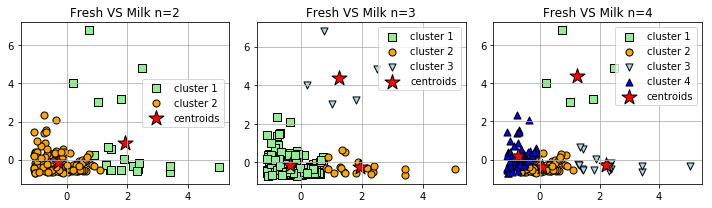

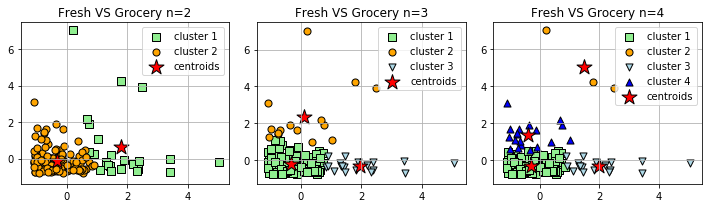

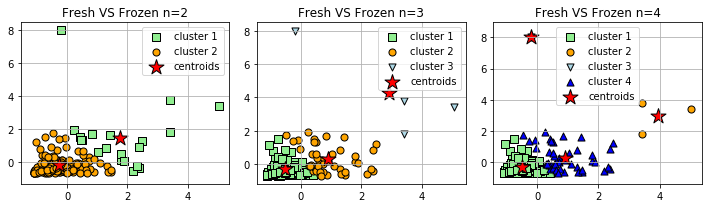

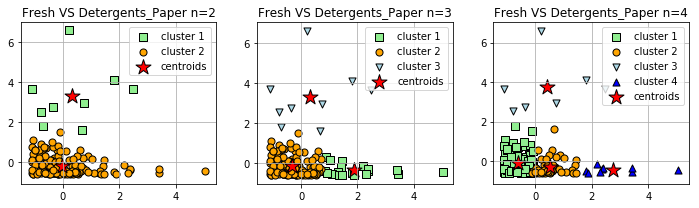

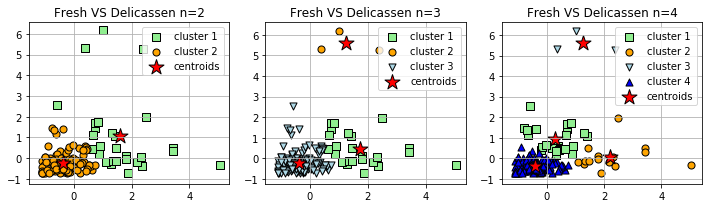

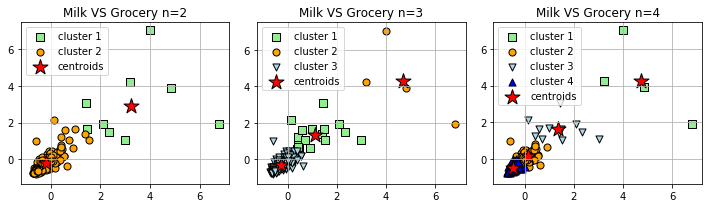

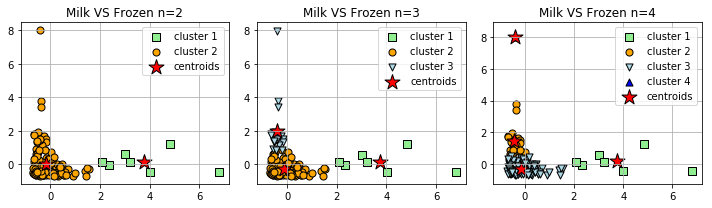

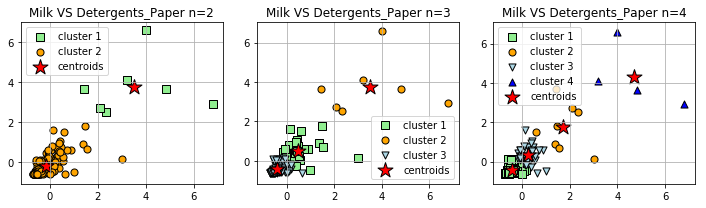

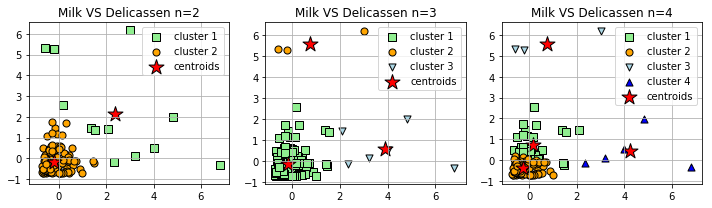

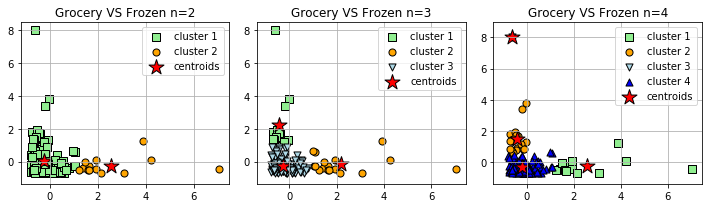

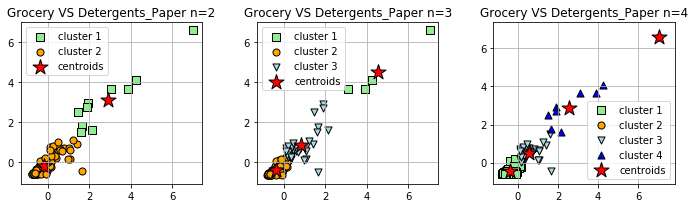

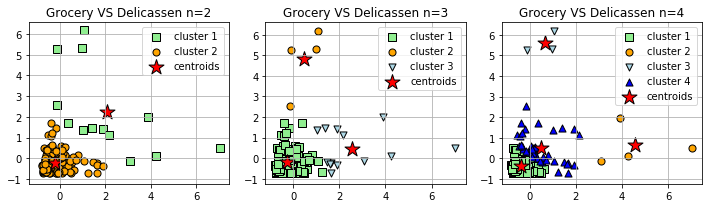

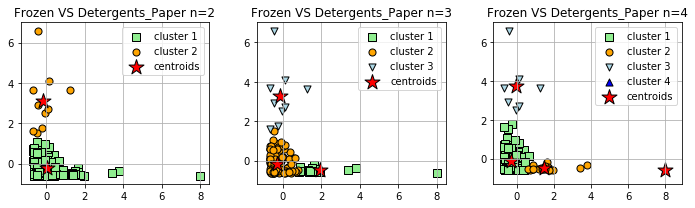

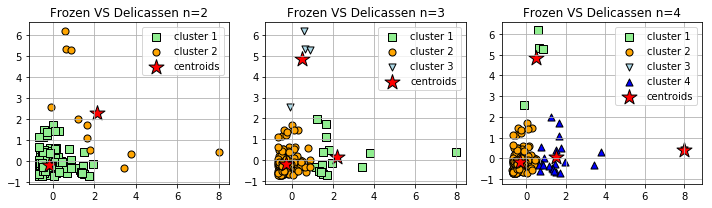

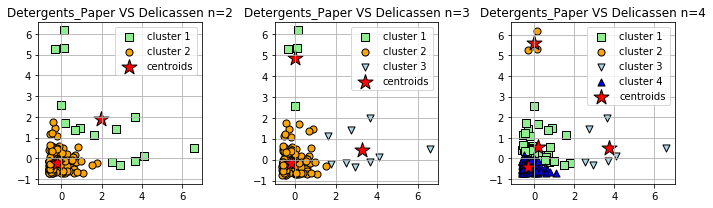

In [8]:
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


name = list(data_cont.columns.values)
name_comb = list(combinations(name, 2))
colors = ['lightgreen', 'orange', 'lightblue', 'blue']
markers = ['s', 'o', 'v', '^']
k_best = np.zeros(len(name_comb), dtype = int)
silhouette_best = -1
silhouette = []
for i in range(len(name_comb)):
    x = data_cont[[name_comb[i][0],name_comb[i][1]]]
    fig, sub = plt.subplots(1, 3, figsize = (10,3))
    for j, ax in zip(list([2, 3, 4]),sub.flatten()):
        km = KMeans(n_clusters = j,
                  init = 'k-means++',
                  n_init = 10,
                  max_iter = 300,
                  tol = 1e-04,
                  random_state = 0)
        y_km = km.fit_predict(x)
        for k in range(j):
            ax.scatter(x.iloc[y_km == k, 0],
                        x.iloc[y_km == k, 1],
                        s = 50,c = colors[k],
                        marker = markers[k], edgecolor = 'black',
                        label = 'cluster ' + str(k+1))
        ax.scatter(km.cluster_centers_[:,0],
                    km.cluster_centers_[:,1],
                    s=250, c = 'red',
                    marker = '*', edgecolor = 'black',
                    label = 'centroids')
        #ax.set_xlim(0,60000)
        #ax.set_ylim(0,50000)
        ax.legend(scatterpoints = 1,loc = 'best')
        ax.grid()
        ax.set_title(name_comb[i][0] + ' VS ' + name_comb[i][1] + ' n=' + str(j))
        silhouette_vals = silhouette_samples(x,y_km,metric = 'euclidean')
        silhouette_avg = np.mean(silhouette_vals)
        if silhouette_avg > silhouette_best:
            k_best[i] = j
            silhouette_best = silhouette_avg
    silhouette.append(silhouette_best)
    silhouette_best = -1
    plt.tight_layout()
    plt.show()

* 每一次的分群，其群數皆考慮2、3、4三種情況。
* 計算用每一組特徵分群下各種分群數的側影係數，並取用側影最佳的分群數。
* 每組特徵的側影係數都在0.5以上。

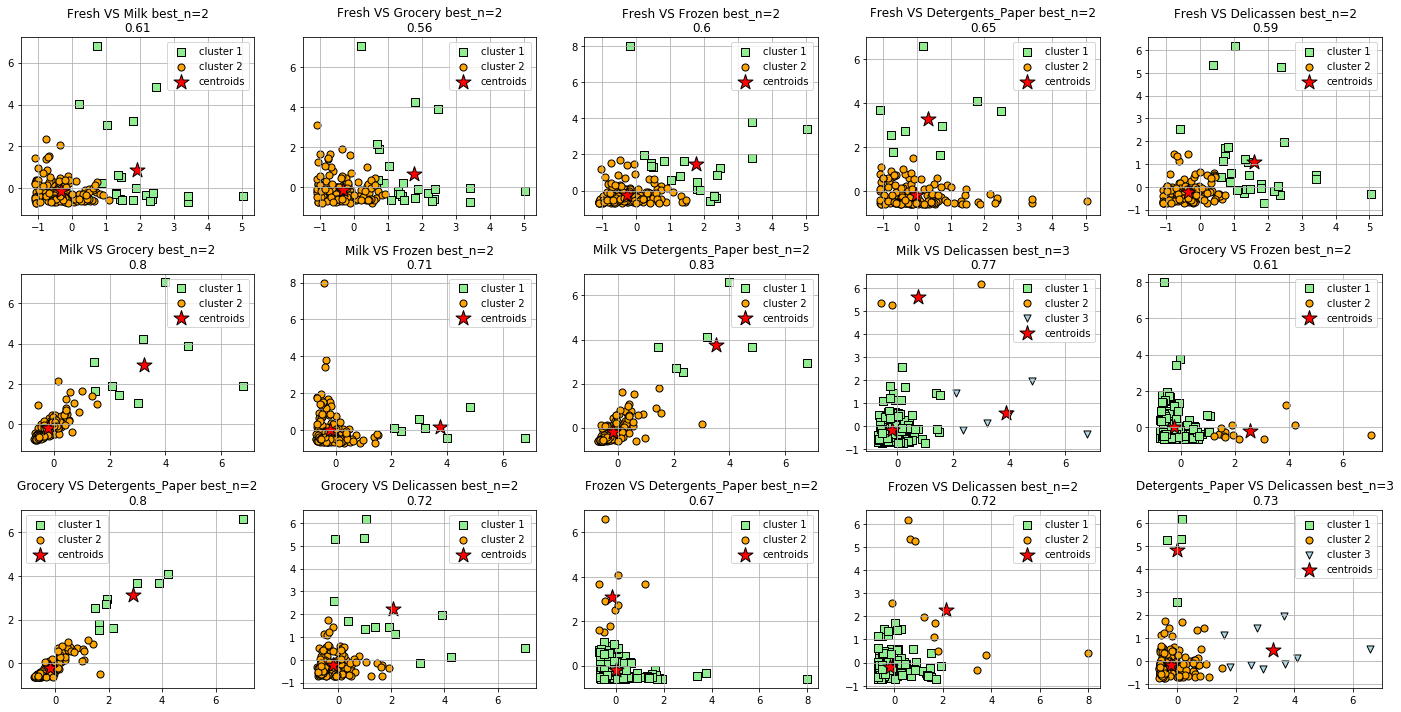

In [16]:
fig, sub = plt.subplots(3, 5, figsize = (20,10))
for i,ax in zip(range(len(name_comb)), sub.flatten()):
    x = data_cont[[name_comb[i][0], name_comb[i][1]]]
    km = KMeans(n_clusters = k_best[i],
              init = 'k-means++',
              n_init = 10,
              max_iter = 300,
              tol = 1e-04,
              random_state = 0)
    y_km = km.fit_predict(x)
    for k in range(k_best[i]):
        ax.scatter(x.iloc[y_km == k, 0],
                   x.iloc[y_km == k, 1],
                   s = 50, c = colors[k],
                   marker = markers[k], edgecolor = 'black',
                   label = 'cluster ' + str(k+1))
    ax.scatter(km.cluster_centers_[:,0],
               km.cluster_centers_[:,1],
               s = 250, c = 'red',
               marker = '*', edgecolor = 'black',
               label = 'centroids')
    #ax.set_xlim(0,60000)
    #ax.set_ylim(0,50000)
    ax.legend(scatterpoints = 1, loc = 'best')
    ax.grid()
    ax.set_title(name_comb[i][0] + ' VS ' + name_comb[i][1] + ' best_n=' + str(k_best[i]) 
                 + '\n' + str(round(silhouette[i],2)))
plt.tight_layout()
plt.show()

* 除了只有兩組特徵側影係數在分群數為3時最佳，其他組特徵側影係數均在分群數為2時最佳。

# average, single, complete, ward 階層式分群

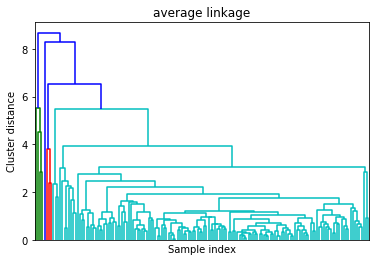

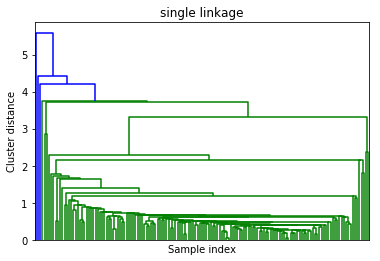

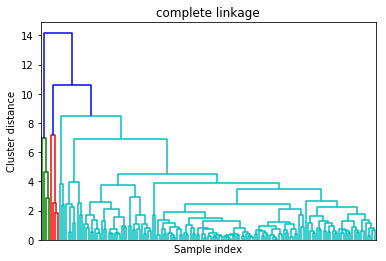

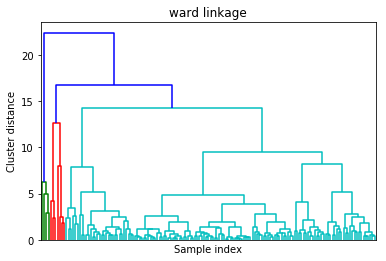

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


for i in list(['average', 'single', 'complete', 'ward']):
    plt.figure()
    complete = linkage(data_cont, method = i, metric = 'euclidean')
    dendrogram(complete)
    plt.xticks([])
    plt.xlabel('Sample index')
    plt.ylabel('Cluster distance')
    plt.title(i + ' linkage')
    plt.show()

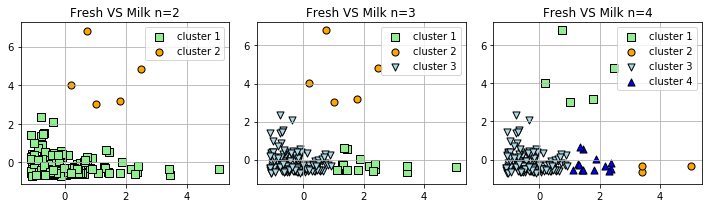

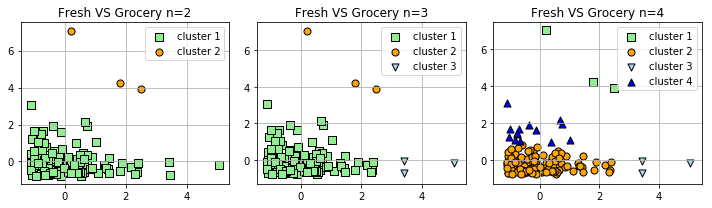

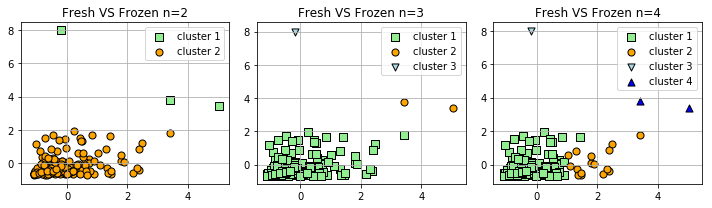

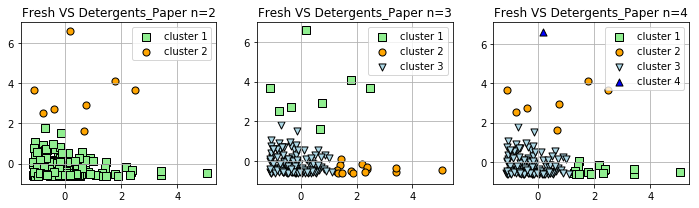

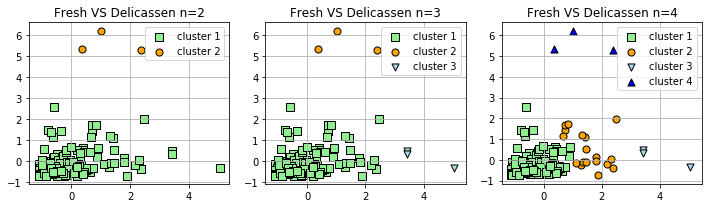

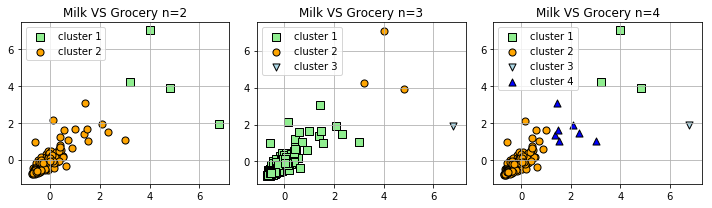

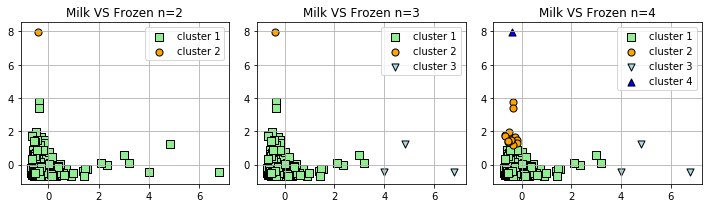

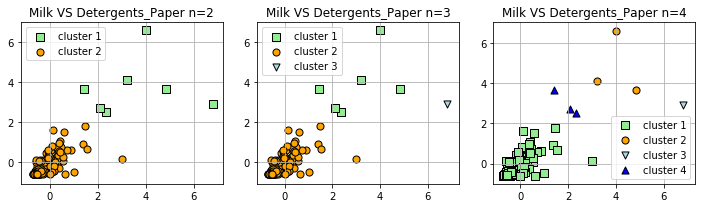

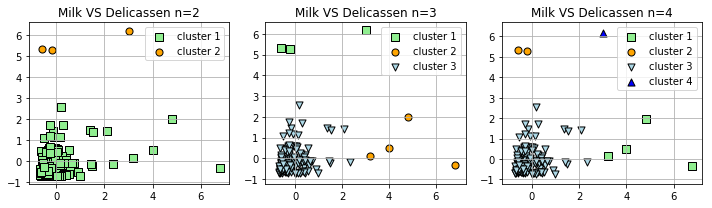

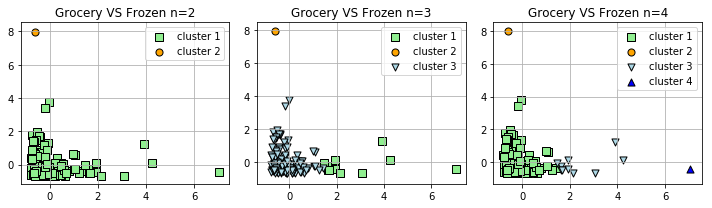

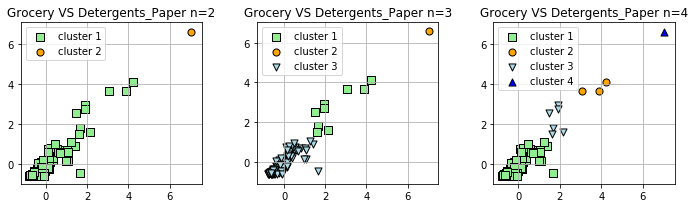

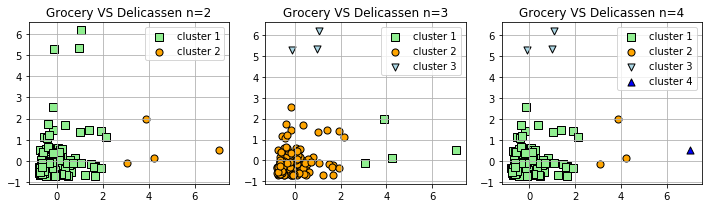

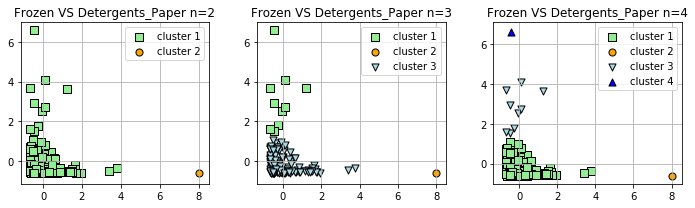

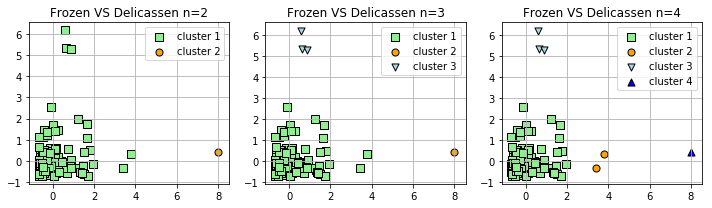

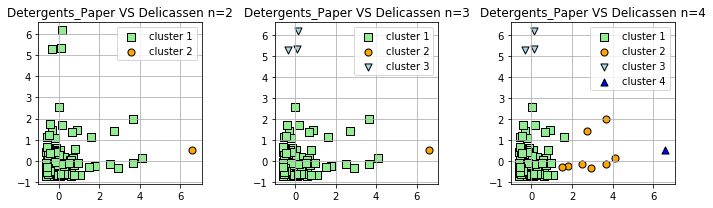

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples


colors = ['lightgreen', 'orange', 'lightblue', 'blue']
markers = ['s', 'o', 'v', '^']
k_best = np.zeros(len(name_comb), dtype = int)
silhouette_best = -1
silhouette = []
for i in range(len(name_comb)):
    x = data_cont[[name_comb[i][0], name_comb[i][1]]]
    fig, sub = plt.subplots(1, 3, figsize = (10,3))
    for j, ax in zip(list([2, 3, 4]), sub.flatten()):
        ac = AgglomerativeClustering(linkage = 'complete',
                                   affinity = 'euclidean',
                                   n_clusters = j)
        labels = ac.fit_predict(x)
        for k in range(j):
            ax.scatter(x.iloc[labels == k,0],
                        x.iloc[labels == k,1],
                        s = 50, c = colors[k],
                        marker = markers[k], edgecolor = 'black',
                        label = 'cluster ' + str(k + 1))

        #ax.set_xlim(0,60000)
        #ax.set_ylim(0,50000)
        ax.legend(scatterpoints = 1, loc = 'best')
        ax.grid()
        ax.set_title(str(name_comb[i][0]) + ' VS ' + str(name_comb[i][1]) + ' n=' + str(j))
        silhouette_vals = silhouette_samples(x, labels, metric = 'euclidean')
        silhouette_avg = np.mean(silhouette_vals)
        if silhouette_avg > silhouette_best:
            k_best[i] = j
            silhouette_best = silhouette_avg
    silhouette.append(silhouette_best)
    silhouette_best = -1
    plt.tight_layout()
    plt.show()

* 用階層式分群作為對比。
* 每一次的分群，其群數皆考慮2、3、4三種情況。
* 計算用每一組特徵分群下各種分群數的側影係數，並取用側影最佳的分群數。

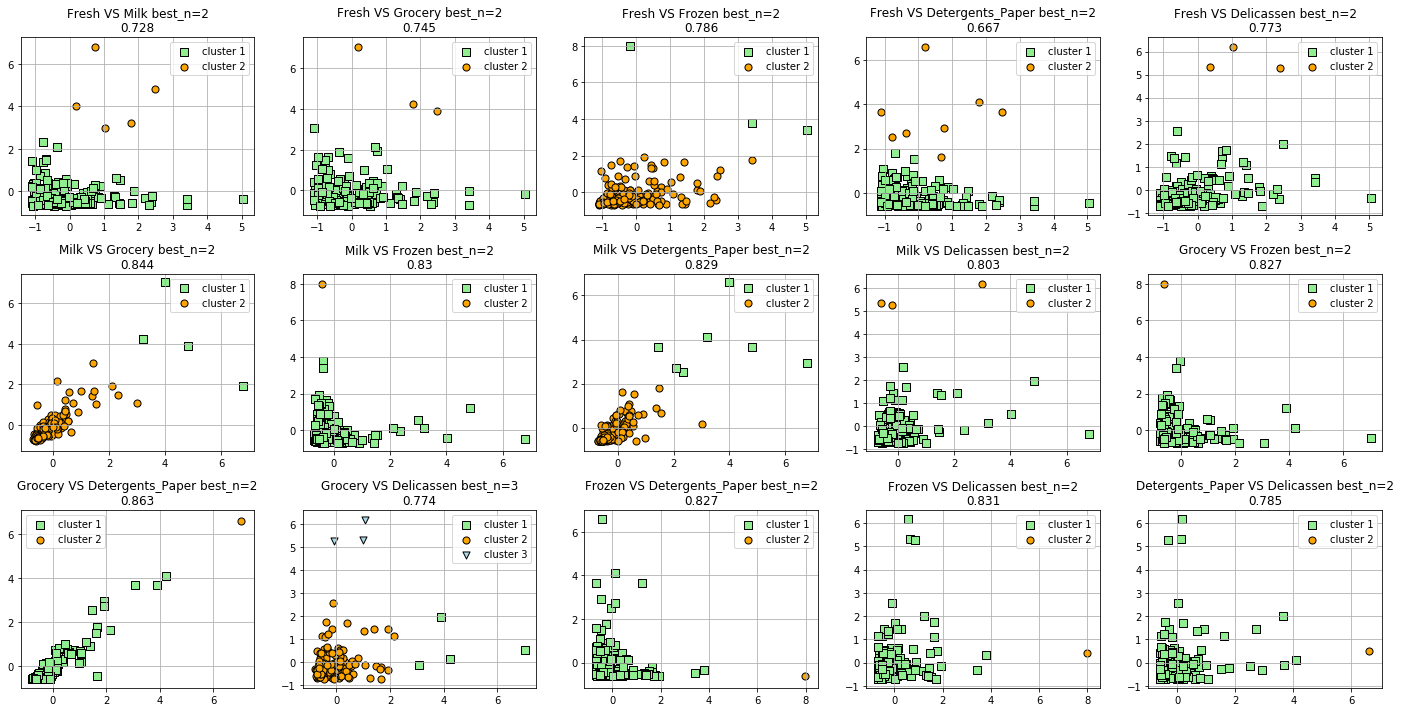

In [21]:
fig, sub = plt.subplots(3,5,figsize=(20,10))
for i, ax in zip(range(len(name_comb)), sub.flatten()):
    x = data_cont[[name_comb[i][0], name_comb[i][1]]]
    ac = AgglomerativeClustering(linkage = 'complete',
                               affinity = 'euclidean',
                               n_clusters=k_best[i])
    labels = ac.fit_predict(x)
    for k in range(k_best[i]):
        ax.scatter(x.iloc[labels == k, 0],
                   x.iloc[labels == k, 1],
                   s = 50,c = colors[k],
                   marker = markers[k], edgecolor = 'black',
                   label = 'cluster ' + str(k + 1))
    #ax.set_xlim(0,60000)
    #ax.set_ylim(0,50000)
    ax.legend(scatterpoints = 1, loc = 'best')
    ax.grid()
    ax.set_title(name_comb[i][0] + ' VS ' + name_comb[i][1] + ' best_n=' + str(k_best[i]) 
                 + '\n' + str(round(silhouette[i], 3)))
plt.tight_layout()
plt.show()

* 每組特徵的側影係數普遍較K-means++分群來的好；最佳群數也都普遍為2。

# DBSCAN 分群

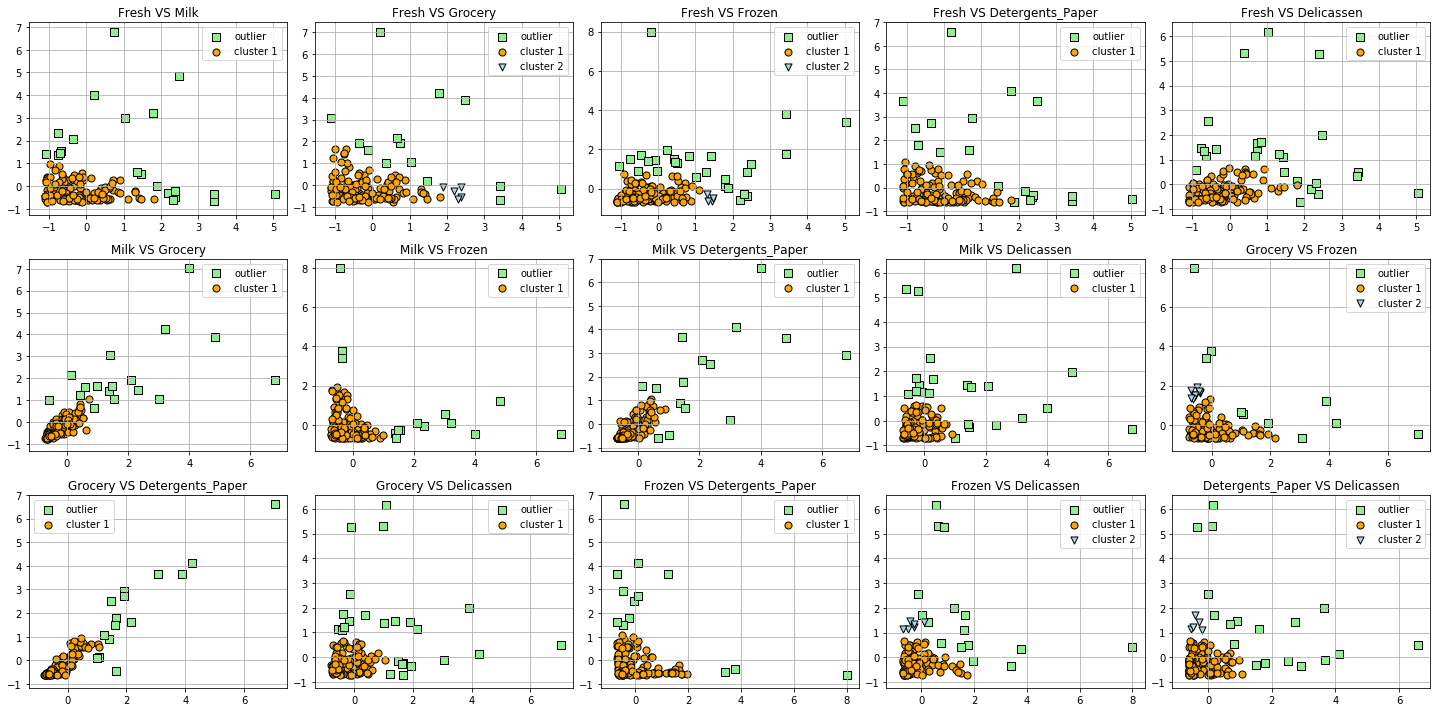

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN


colors = ['lightgreen', 'orange', 'lightblue', 'blue']
markers = ['s', 'o', 'v', '^']
fig, sub = plt.subplots(3, 5, figsize = (20, 10))
for i, ax in zip(range(len(name_comb)), sub.flatten()):
    x = data_cont[[name_comb[i][0], name_comb[i][1]]]
    std = np.std(x.values)
    eps = std * 0.4
    db = DBSCAN(eps = eps, min_samples = 5, metric = 'euclidean')
    y_db = db.fit_predict(x)
    for k, w in zip(list(np.unique(y_db)), range(len(np.unique(y_db)))):
        if k == -1:
            ax.scatter(x.iloc[y_db == k, 0],
                       x.iloc[y_db == k, 1],
                       s=50, c = colors[w],
                       marker = markers[w], edgecolor = 'black',
                       label = 'outlier')
        else:
            ax.scatter(x.iloc[y_db == k, 0],
                       x.iloc[y_db == k, 1],
                       s=50, c = colors[w],
                       marker = markers[w], edgecolor = 'black',
                       label = 'cluster ' + str(k + 1))
    #ax.set_xlim(0,60000)
    #ax.set_ylim(0,50000)
    ax.legend(scatterpoints = 1, loc = 'best')
    ax.grid()
    ax.set_title(str(name_comb[i][0]) + ' VS ' + str(name_comb[i][1]))
plt.tight_layout()
plt.show()

* 用DBSCAN來分群，半徑⾨門檻值以該每兩組特徵的標準差乘上0.4來計算，當乘上小於0.4的數時，離群值數目將大幅上升；乘上大於0.4的數時，模型幾乎都會把資料分成一群。
* 對於該資料集而言，DBSCAN分群方法較k-mean++與階層式分群差，普遍都將資料分成一類。
